

At Santander our mission is to help people and businesses prosper. We are always looking for ways to help our customers understand their financial health and identify which products and services might help them achieve their monetary goals.


In this competition we are asked to predict if a customer will make a transaction or not regardless of the amount of money transacted. Hence our goal is to solve a binary classification problem. In the data description you can see that the features given are numeric and anonymized. Furthermore the data seems to be artificial as they state that "the data has the same structure as our real data".

In [1]:
#loading the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#loading the dataset
dataset=pd.read_csv('train.csv')

In [3]:
#for seeing the first five dataset
dataset.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


C:\Users\ashish saha\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


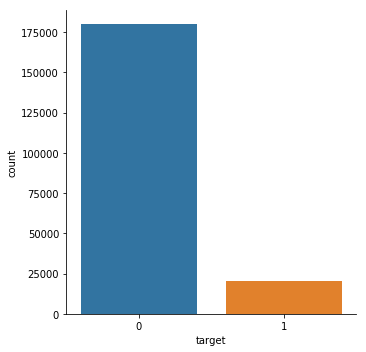

In [23]:
#visualising the Target coloumn by factorplot
sns.factorplot('target', data=dataset, kind='count')

After visualise the factorplot we can analyse that in target coloumn there is imbalanced data i.e frequency of class 0 is greater then class 1.Hence, it is the case of imbalanced the dataset because frequency of class 0 is 90% where frequency of class 1 is 10%. 

In [29]:
#count of both class(number of classes)
dataset['target'].value_counts()

0    179902
1     20098
Name: target, dtype: int64

In [30]:
#draw corelation matrix
y=dataset.corr()
y

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
target,1.000000,0.052390,0.050343,0.055870,0.011055,0.010915,0.030979,6.673085e-02,-0.003025,0.019584,...,0.055973,0.047114,-0.042858,-0.017709,-0.022838,0.028285,0.023608,-0.035303,-0.053000,0.025434
var_0,0.052390,1.000000,-0.000544,0.006573,0.003801,0.001326,0.003046,6.982549e-03,0.002429,0.004962,...,0.002752,0.000206,-0.005373,0.001616,-0.001514,0.002073,0.004386,-0.000753,-0.005776,0.003850
var_1,0.050343,-0.000544,1.000000,0.003980,0.000010,0.000303,-0.000902,3.257729e-03,0.001511,0.004098,...,0.006627,0.003621,-0.002604,0.001153,-0.002557,-0.000785,-0.000377,-0.004157,-0.004861,0.002287
var_2,0.055870,0.006573,0.003980,1.000000,0.001001,0.000723,0.001569,8.825211e-04,-0.000991,0.002648,...,0.000197,0.001285,-0.003400,0.000549,0.002104,-0.001070,0.003952,0.001078,-0.000877,0.003855
var_3,0.011055,0.003801,0.000010,0.001001,1.000000,-0.000322,0.003253,-7.743892e-04,0.002500,0.003553,...,0.000151,0.002445,-0.001530,-0.001699,-0.001054,0.001206,-0.002800,0.001164,-0.001651,0.000506
var_4,0.010915,0.001326,0.000303,0.000723,-0.000322,1.000000,-0.001368,4.882529e-05,0.004549,0.001194,...,0.001514,0.004357,0.003347,0.000813,-0.000068,0.003706,0.000513,-0.000046,-0.001821,-0.000786
var_5,0.030979,0.003046,-0.000902,0.001569,0.003253,-0.001368,1.000000,2.587780e-03,-0.000995,0.000147,...,0.001466,-0.000022,0.001116,-0.002237,-0.002543,-0.001274,0.002880,-0.000535,-0.000953,0.002767
var_6,0.066731,0.006983,0.003258,0.000883,-0.000774,0.000049,0.002588,1.000000e+00,-0.002548,-0.001188,...,0.000721,0.005604,-0.002563,0.002464,-0.001141,0.001244,0.005378,-0.003565,-0.003025,0.006096
var_7,-0.003025,0.002429,0.001511,-0.000991,0.002500,0.004549,-0.000995,-2.547746e-03,1.000000,0.000814,...,-0.000337,-0.003957,0.001733,0.003219,-0.000270,0.001854,0.001045,0.003466,0.000650,-0.001457
var_8,0.019584,0.004962,0.004098,0.002648,0.003553,0.001194,0.000147,-1.187995e-03,0.000814,1.000000,...,0.002923,-0.001151,-0.000429,0.001414,0.001313,0.001396,-0.003242,-0.004583,0.002950,0.000854


In [ ]:
#Description of dataset
dataset.describe()

In [ ]:
#find how many coloumn of string
dataset.describe(include='object')
#only one type of coloumn is object type

Here it is the case of imbalanced dataset so, imbalanced dataset can be handled by two process
1) Oversampling
2) Undersampling

Undersampling
    This method works with majority class. It reduces the number of observations from majority class to make the data set balanced. This method is best to use when the data set is huge and reducing the number of training samples helps to improve run time and storage troubles.

Oversampling
    This method works with minority class. It replicates the observations from minority class to balance the data. It is also known as upsampling.
    
    HERE IN OUR DATASET WE DO UNDERSAMPLING

In [4]:
#WE seperate the dataset whose target class is belong to class 0
data=dataset.loc[dataset['target'] == 0]
#choose starting 24000 rows
data2=data.loc[:24000]
data2

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104
5,train_5,0,11.4763,-2.3182,12.6080,8.6264,10.9621,3.5609,4.5322,15.2255,...,-6.3068,6.6025,5.2912,0.4403,14.9452,1.0314,-3.6241,9.7670,12.5809,-4.7602
6,train_6,0,11.8091,-0.0832,9.3494,4.2916,11.1355,-8.0198,6.1961,12.0771,...,8.7830,6.4521,3.5325,0.1777,18.3314,0.5845,9.1104,9.1143,10.8869,-3.2097
7,train_7,0,13.5580,-7.9881,13.8776,7.5985,8.6543,0.8310,5.6890,22.3262,...,13.1700,6.5491,3.9906,5.8061,23.1407,-0.3776,4.2178,9.4237,8.6624,3.4806
8,train_8,0,16.1071,2.4426,13.9307,5.6327,8.8014,6.1630,4.4514,10.1854,...,1.4298,14.7510,1.6395,1.4181,14.8370,-1.9940,-1.0733,8.1975,19.5114,4.8453
9,train_9,0,12.5088,1.9743,8.8960,5.4508,13.6043,-16.2859,6.0637,16.8410,...,0.5543,6.3160,1.0371,3.6885,14.8344,0.4467,14.1287,7.9133,16.2375,14.2514


In [5]:
#WE seperate the dataset whose target class is belong to class 1
data1=dataset.loc[dataset['target'] == 1]
data1


,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
13,train_13,1,16.3699,1.5934,16.7395,7.3330,12.1450,5.9004,4.8222,20.9729,...,7.4002,7.4031,4.3989,4.0978,17.3638,-1.3022,9.6846,9.0419,15.6064,-10.8529
29,train_29,1,5.3301,-2.6064,13.1913,3.1193,6.6483,-6.5659,5.9064,15.2341,...,5.9215,7.9676,2.3405,1.1482,23.2168,-2.0105,3.7600,9.4513,17.4105,-14.6897
63,train_63,1,7.7072,0.0183,9.9974,8.3524,9.2886,-13.3627,6.0425,10.1108,...,1.5832,5.0039,3.8814,7.4241,21.4844,-0.8297,-3.0468,7.5790,15.7685,5.4769
65,train_65,1,10.5358,-2.5439,8.7394,6.7548,14.4099,-3.8724,5.1584,15.8381,...,4.6648,6.4227,3.4025,-4.0882,14.1174,-0.2472,5.3847,8.6949,15.1340,3.8449
71,train_71,1,6.7547,2.5973,14.2141,8.3514,7.4942,-1.3055,4.2336,15.0243,...,1.4677,3.5935,2.0013,1.5777,18.2820,-4.3408,6.8869,9.3567,18.9013,13.3447
72,train_72,1,8.6470,0.4462,10.9808,10.1859,13.9121,-16.4645,5.2837,13.8396,...,6.6004,13.0969,2.2437,0.6260,23.4572,0.3117,8.1634,7.9248,10.5462,-17.8708
84,train_84,1,14.6825,6.7583,9.7766,9.9461,7.9207,-2.7174,5.4594,20.1579,...,4.3388,10.4738,2.3715,1.5612,18.8488,-1.2723,8.7246,7.7010,15.2861,9.8048
99,train_99,1,9.4554,-3.5377,8.1026,7.4557,12.8716,4.4526,4.1798,19.0480,...,11.4642,9.4043,2.4608,5.1603,21.9483,-0.9451,-5.9209,9.7453,16.3138,-14.8816
119,train_119,1,12.6769,-0.4517,6.7371,9.4245,12.7274,3.0585,5.7957,15.5797,...,1.6877,9.6047,0.7896,10.2968,20.0513,-0.9380,10.2037,7.7482,13.2917,-11.2830
120,train_120,1,7.6382,-6.3480,8.3145,7.6210,10.6435,-8.8025,7.1044,20.6761,...,-1.6585,13.7319,0.8665,10.6605,24.4835,0.1339,-4.0743,7.8159,19.4458,-19.9356


In [6]:
#Add both Dataframe data1 and data2 in one dataframe
newdata=pd.concat([data1, data2], ignore_index=True)
newdata

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_13,1,16.3699,1.5934,16.7395,7.3330,12.1450,5.9004,4.8222,20.9729,...,7.4002,7.4031,4.3989,4.0978,17.3638,-1.3022,9.6846,9.0419,15.6064,-10.8529
1,train_29,1,5.3301,-2.6064,13.1913,3.1193,6.6483,-6.5659,5.9064,15.2341,...,5.9215,7.9676,2.3405,1.1482,23.2168,-2.0105,3.7600,9.4513,17.4105,-14.6897
2,train_63,1,7.7072,0.0183,9.9974,8.3524,9.2886,-13.3627,6.0425,10.1108,...,1.5832,5.0039,3.8814,7.4241,21.4844,-0.8297,-3.0468,7.5790,15.7685,5.4769
3,train_65,1,10.5358,-2.5439,8.7394,6.7548,14.4099,-3.8724,5.1584,15.8381,...,4.6648,6.4227,3.4025,-4.0882,14.1174,-0.2472,5.3847,8.6949,15.1340,3.8449
4,train_71,1,6.7547,2.5973,14.2141,8.3514,7.4942,-1.3055,4.2336,15.0243,...,1.4677,3.5935,2.0013,1.5777,18.2820,-4.3408,6.8869,9.3567,18.9013,13.3447
5,train_72,1,8.6470,0.4462,10.9808,10.1859,13.9121,-16.4645,5.2837,13.8396,...,6.6004,13.0969,2.2437,0.6260,23.4572,0.3117,8.1634,7.9248,10.5462,-17.8708
6,train_84,1,14.6825,6.7583,9.7766,9.9461,7.9207,-2.7174,5.4594,20.1579,...,4.3388,10.4738,2.3715,1.5612,18.8488,-1.2723,8.7246,7.7010,15.2861,9.8048
7,train_99,1,9.4554,-3.5377,8.1026,7.4557,12.8716,4.4526,4.1798,19.0480,...,11.4642,9.4043,2.4608,5.1603,21.9483,-0.9451,-5.9209,9.7453,16.3138,-14.8816
8,train_119,1,12.6769,-0.4517,6.7371,9.4245,12.7274,3.0585,5.7957,15.5797,...,1.6877,9.6047,0.7896,10.2968,20.0513,-0.9380,10.2037,7.7482,13.2917,-11.2830
9,train_120,1,7.6382,-6.3480,8.3145,7.6210,10.6435,-8.8025,7.1044,20.6761,...,-1.6585,13.7319,0.8665,10.6605,24.4835,0.1339,-4.0743,7.8159,19.4458,-19.9356


In [7]:
#Suffle the Dataframe
newdata=newdata.sample(frac=1)
newdata


,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
26527,train_7129,0,12.3797,3.0421,11.3248,8.7745,13.6109,1.9612,5.2226,18.8056,...,6.0561,8.9725,2.7283,8.9358,14.4597,2.0824,9.4064,9.1890,15.8723,15.1291
30490,train_11517,0,7.5940,-0.5159,14.1212,3.1400,11.1058,-7.1090,6.6025,16.5209,...,4.9155,4.5671,0.1365,8.2398,18.7374,-1.7678,0.8029,7.4734,19.2636,2.1359
25017,train_5445,0,6.6791,-7.9880,9.2067,5.3087,12.5855,-3.8427,4.7047,14.6442,...,0.2276,13.9635,3.3346,-7.4988,14.7375,-0.7395,-6.7301,8.8540,13.6309,-9.5104
22608,train_2799,0,10.7152,-7.7592,12.7518,4.3000,14.3012,5.3744,6.6910,14.2834,...,4.8537,11.7819,1.5472,0.6535,17.2225,-2.3353,9.1399,7.1961,15.5729,-9.6968
35644,train_17224,0,8.2013,1.9154,16.4280,4.1130,9.1370,-5.4574,5.2681,19.7462,...,1.7300,10.7974,3.1268,-3.1758,17.8384,-0.1949,4.9701,8.2877,16.9539,-6.5915
25618,train_6119,0,12.7453,-2.8507,10.6897,12.9773,8.6258,-2.6014,5.4829,17.7500,...,-4.8607,8.2327,-0.7403,7.0065,13.5328,1.6507,1.5479,8.4692,17.0696,-1.0826
20480,train_421,0,13.4262,-5.2815,12.1551,9.5761,12.9323,-6.6530,4.6716,19.9432,...,2.8242,8.5453,4.1049,2.7898,11.1159,-0.8511,-2.8353,8.1537,20.9104,-5.5538
7753,train_77432,1,17.2693,7.1509,9.8787,10.0231,12.0224,4.8505,5.7451,13.8947,...,6.8544,7.9590,3.8742,3.1587,15.9181,2.7409,2.2765,8.3133,12.8403,3.5161
27757,train_8501,0,10.6984,2.1679,5.5715,3.5522,9.3070,-2.3718,5.3820,14.6139,...,-0.6627,15.8089,5.1455,3.7678,17.5113,-1.3040,5.9049,10.1614,20.7221,-19.5079
11261,train_112418,1,13.1610,-5.4778,8.5391,7.3826,10.2011,-21.4344,7.5920,15.7317,...,10.5706,11.4116,4.7105,3.8065,17.7237,-1.6569,1.8861,8.1511,18.1325,-14.9381


C:\Users\ashish saha\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


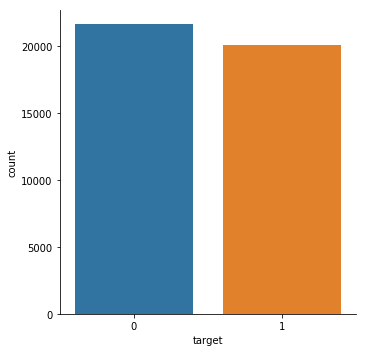

In [24]:
sns.factorplot('target', data=newdata, kind='count')

In [8]:
#Seperate the input features and stord in variable x
x=newdata.iloc[:,2:].values
x=pd.DataFrame(x)
x

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,12.3797,3.0421,11.3248,8.7745,13.6109,1.9612,5.2226,18.8056,-4.1728,9.0027,...,6.0561,8.9725,2.7283,8.9358,14.4597,2.0824,9.4064,9.1890,15.8723,15.1291
1,7.5940,-0.5159,14.1212,3.1400,11.1058,-7.1090,6.6025,16.5209,-2.9955,5.5513,...,4.9155,4.5671,0.1365,8.2398,18.7374,-1.7678,0.8029,7.4734,19.2636,2.1359
2,6.6791,-7.9880,9.2067,5.3087,12.5855,-3.8427,4.7047,14.6442,-1.9235,6.4610,...,0.2276,13.9635,3.3346,-7.4988,14.7375,-0.7395,-6.7301,8.8540,13.6309,-9.5104
3,10.7152,-7.7592,12.7518,4.3000,14.3012,5.3744,6.6910,14.2834,-4.3132,8.0362,...,4.8537,11.7819,1.5472,0.6535,17.2225,-2.3353,9.1399,7.1961,15.5729,-9.6968
4,8.2013,1.9154,16.4280,4.1130,9.1370,-5.4574,5.2681,19.7462,-2.6477,5.7589,...,1.7300,10.7974,3.1268,-3.1758,17.8384,-0.1949,4.9701,8.2877,16.9539,-6.5915
5,12.7453,-2.8507,10.6897,12.9773,8.6258,-2.6014,5.4829,17.7500,-1.9789,8.9154,...,-4.8607,8.2327,-0.7403,7.0065,13.5328,1.6507,1.5479,8.4692,17.0696,-1.0826
6,13.4262,-5.2815,12.1551,9.5761,12.9323,-6.6530,4.6716,19.9432,2.4931,8.8679,...,2.8242,8.5453,4.1049,2.7898,11.1159,-0.8511,-2.8353,8.1537,20.9104,-5.5538
7,17.2693,7.1509,9.8787,10.0231,12.0224,4.8505,5.7451,13.8947,-1.7210,7.4196,...,6.8544,7.9590,3.8742,3.1587,15.9181,2.7409,2.2765,8.3133,12.8403,3.5161
8,10.6984,2.1679,5.5715,3.5522,9.3070,-2.3718,5.3820,14.6139,5.6893,7.4120,...,-0.6627,15.8089,5.1455,3.7678,17.5113,-1.3040,5.9049,10.1614,20.7221,-19.5079
9,13.1610,-5.4778,8.5391,7.3826,10.2011,-21.4344,7.5920,15.7317,5.4673,8.1482,...,10.5706,11.4116,4.7105,3.8065,17.7237,-1.6569,1.8861,8.1511,18.1325,-14.9381


In [10]:
#Seprate the target class and store the class in y variable
y=newdata.iloc[:,1].values
y=pd.DataFrame(y)
y

,0
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,1
8,0
9,1


In [11]:
#Splitting the dataset into training and testing dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=100,test_size=0.2)

In [12]:
#Applying Feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [18]:
#Applying PCA
from sklearn.decomposition import PCA
pca=PCA(n_components=80)
PCA_X_train=pca.fit_transform(X_train)
PCA_X_test=pca.fit_transform(X_test)
explain=pca.explained_variance_ratio_.tolist()
explain

[0.008142476614102287,
 0.006444522233782163,
 0.0064146203829913775,
 0.006384764105143588,
 0.006335150810035511,
 0.006324972437715283,
 0.006291096619923923,
 0.006243144849699259,
 0.006233186415846184,
 0.0061971553723407236,
 0.006193502291914694,
 0.006169237285367988,
 0.006152003083739841,
 0.006112693377160205,
 0.006099410154851018,
 0.006092755443954329,
 0.006051185317840916,
 0.0060245263027728525,
 0.00598383208270869,
 0.005975637595499772,
 0.005929391280279327,
 0.00592361914347624,
 0.005883469546768357,
 0.00586640964255475,
 0.005819039089765487,
 0.005813750035975309,
 0.005801359385173807,
 0.005766274294794794,
 0.005749668957140627,
 0.005733852651834864,
 0.005704101983162384,
 0.005696879984445093,
 0.005685144303776714,
 0.005657514995853476,
 0.005649631939281759,
 0.005627767973237585,
 0.005604111003763852,
 0.005587058640558446,
 0.005537188129628485,
 0.0055236012608635525,
 0.005504653786274539,
 0.005497750326509905,
 0.00549128719734515,
 0.00547396

In [19]:
#Applying Random Forest 
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=1500,random_state=0)
classifier.fit(PCA_X_train,y_train)

C:\Users\ashish saha\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1500, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [20]:
#Predict from test data
y_pred=classifier.predict(PCA_X_test)

In [26]:
#Appliying confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[3353,  914],
       [1075, 3003]], dtype=int64)

In [27]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred, average='binary')

0.751219512195122

Here we can see that our model accuracy is 76% and f1 score is 75%

In [28]:
#find precision ,recall,fscore,support
from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(y_test, y_pred)
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))


precision: [0.75722674 0.76665816]
recall: [0.78579798 0.73639039]
fscore: [0.77124784 0.75121951]


EXTRA 

We can use kfold cross validation and parameter tunning to check performance of model . Here below i show the code of parameter tunning and kfold cross validation. 

by finding Mean and Standard deviation we can analyse bias and variance of our model.and we can analyse how our model perform on unseen data

In [ ]:
#Code of parameter tunning of model
from sklearn.model_selection import GridSearchCV
parameters = [{'n_estimators': [100]},
              {'n_estimators': [600]},
             {'n_estimators' : [1500]}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
